In [19]:
import sqlite3
from pathlib import Path
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [20]:
def rotate_matrix(matrix):
    return np.rot90(np.flip(matrix, axis=0), k=-1)

In [21]:
# path to databases
db_path_exp1 = Path('E:/HumanA/Data/DataBase/HumanA_Exp1.db')
db_path_exp2 = Path('E:/HumanA/Data/DataBase/HumanA_Exp2.db')
#db_path_exp1 = Path('E:/HumanA/Data/HumanA_Exp1_WorkingData.db')
#db_path_exp2 = Path('E:/HumanA/Data/HumanA_Exp2_WorkingData.db')

In [22]:
# connect to database
connection=sqlite3.connect(db_path_exp1)
cr=connection.cursor()

In [23]:
# get mask from database
sql_instruction = """ SELECT Row, Column,Value FROM density_matrix"""
cr.execute(sql_instruction)

In [24]:
density_matrix_values_exp1 = cr.fetchall()

In [25]:
# connect to database
connection=sqlite3.connect(db_path_exp2)
cr=connection.cursor()

In [26]:
# get mask from database
sql_instruction = """ SELECT Row, Column,Value FROM density_matrix"""
cr.execute(sql_instruction)

In [27]:
density_matrix_values_exp2 = cr.fetchall()

In [28]:
# recreate mask from database
last_row = 0
dmatrix_val_exp1_cur_row = []
dmatrix_val_exp1_comp = []
for i in density_matrix_values_exp1:
    if i[0] == last_row:
        dmatrix_val_exp1_cur_row.append(i[2])
    else:
        dmatrix_val_exp1_comp.append(dmatrix_val_exp1_cur_row)
        dmatrix_val_exp1_cur_row = [i[2]]
    last_row = i[0]
    
density_matrix_exp1 = np.asarray(dmatrix_val_exp1_comp)

In [29]:
# recreate mask from database
last_row = 0
dmatrix_val_exp2_cur_row = []
dmatrix_val_exp2_comp = []
for i in density_matrix_values_exp2:
    if i[0] == last_row:
        dmatrix_val_exp2_cur_row.append(i[2])
    else:
        dmatrix_val_exp2_comp.append(dmatrix_val_exp2_cur_row)
        dmatrix_val_exp2_cur_row = [i[2]]
    last_row = i[0]
    
density_matrix_exp2 = np.asarray(dmatrix_val_exp2_comp)

In [30]:
#print(density_matrix_exp1.shape)
#for row in range(density_matrix_exp1.shape[0]):
#    for column in range(density_matrix_exp1.shape[1]):
#        if density_matrix_exp1[row][column] != 0:
#            print("Row: " + str(row) + " | Column: " + str(column) + " | value: " + str(density_matrix_exp1[row][column]))

In [31]:
# calculate normalized integral of density matrix for experiment 1
sum_density_matrix_exp1 = sum(sum(density_matrix_exp1))
norm_sum_exp1 = 0
for row in density_matrix_exp1:
    for value in row:
        norm_sum_exp1 += value/sum_density_matrix_exp1

print("Normalized Integral Experiment 1: " + str(norm_sum_exp1))

# calculate normalized integral of density matrix for experiment 2
sum_density_matrix_exp2 = sum(sum(density_matrix_exp2))
norm_sum_exp2 = 0
for row in density_matrix_exp2:
    for value in row:
        norm_sum_exp2 += value/sum_density_matrix_exp2

print("Normalized Integral Experiment 2: " + str(norm_sum_exp2))

Normalized Integral Experiment 1: 1.0000000000000016
Normalized Integral Experiment 2: 1.0000000000000009


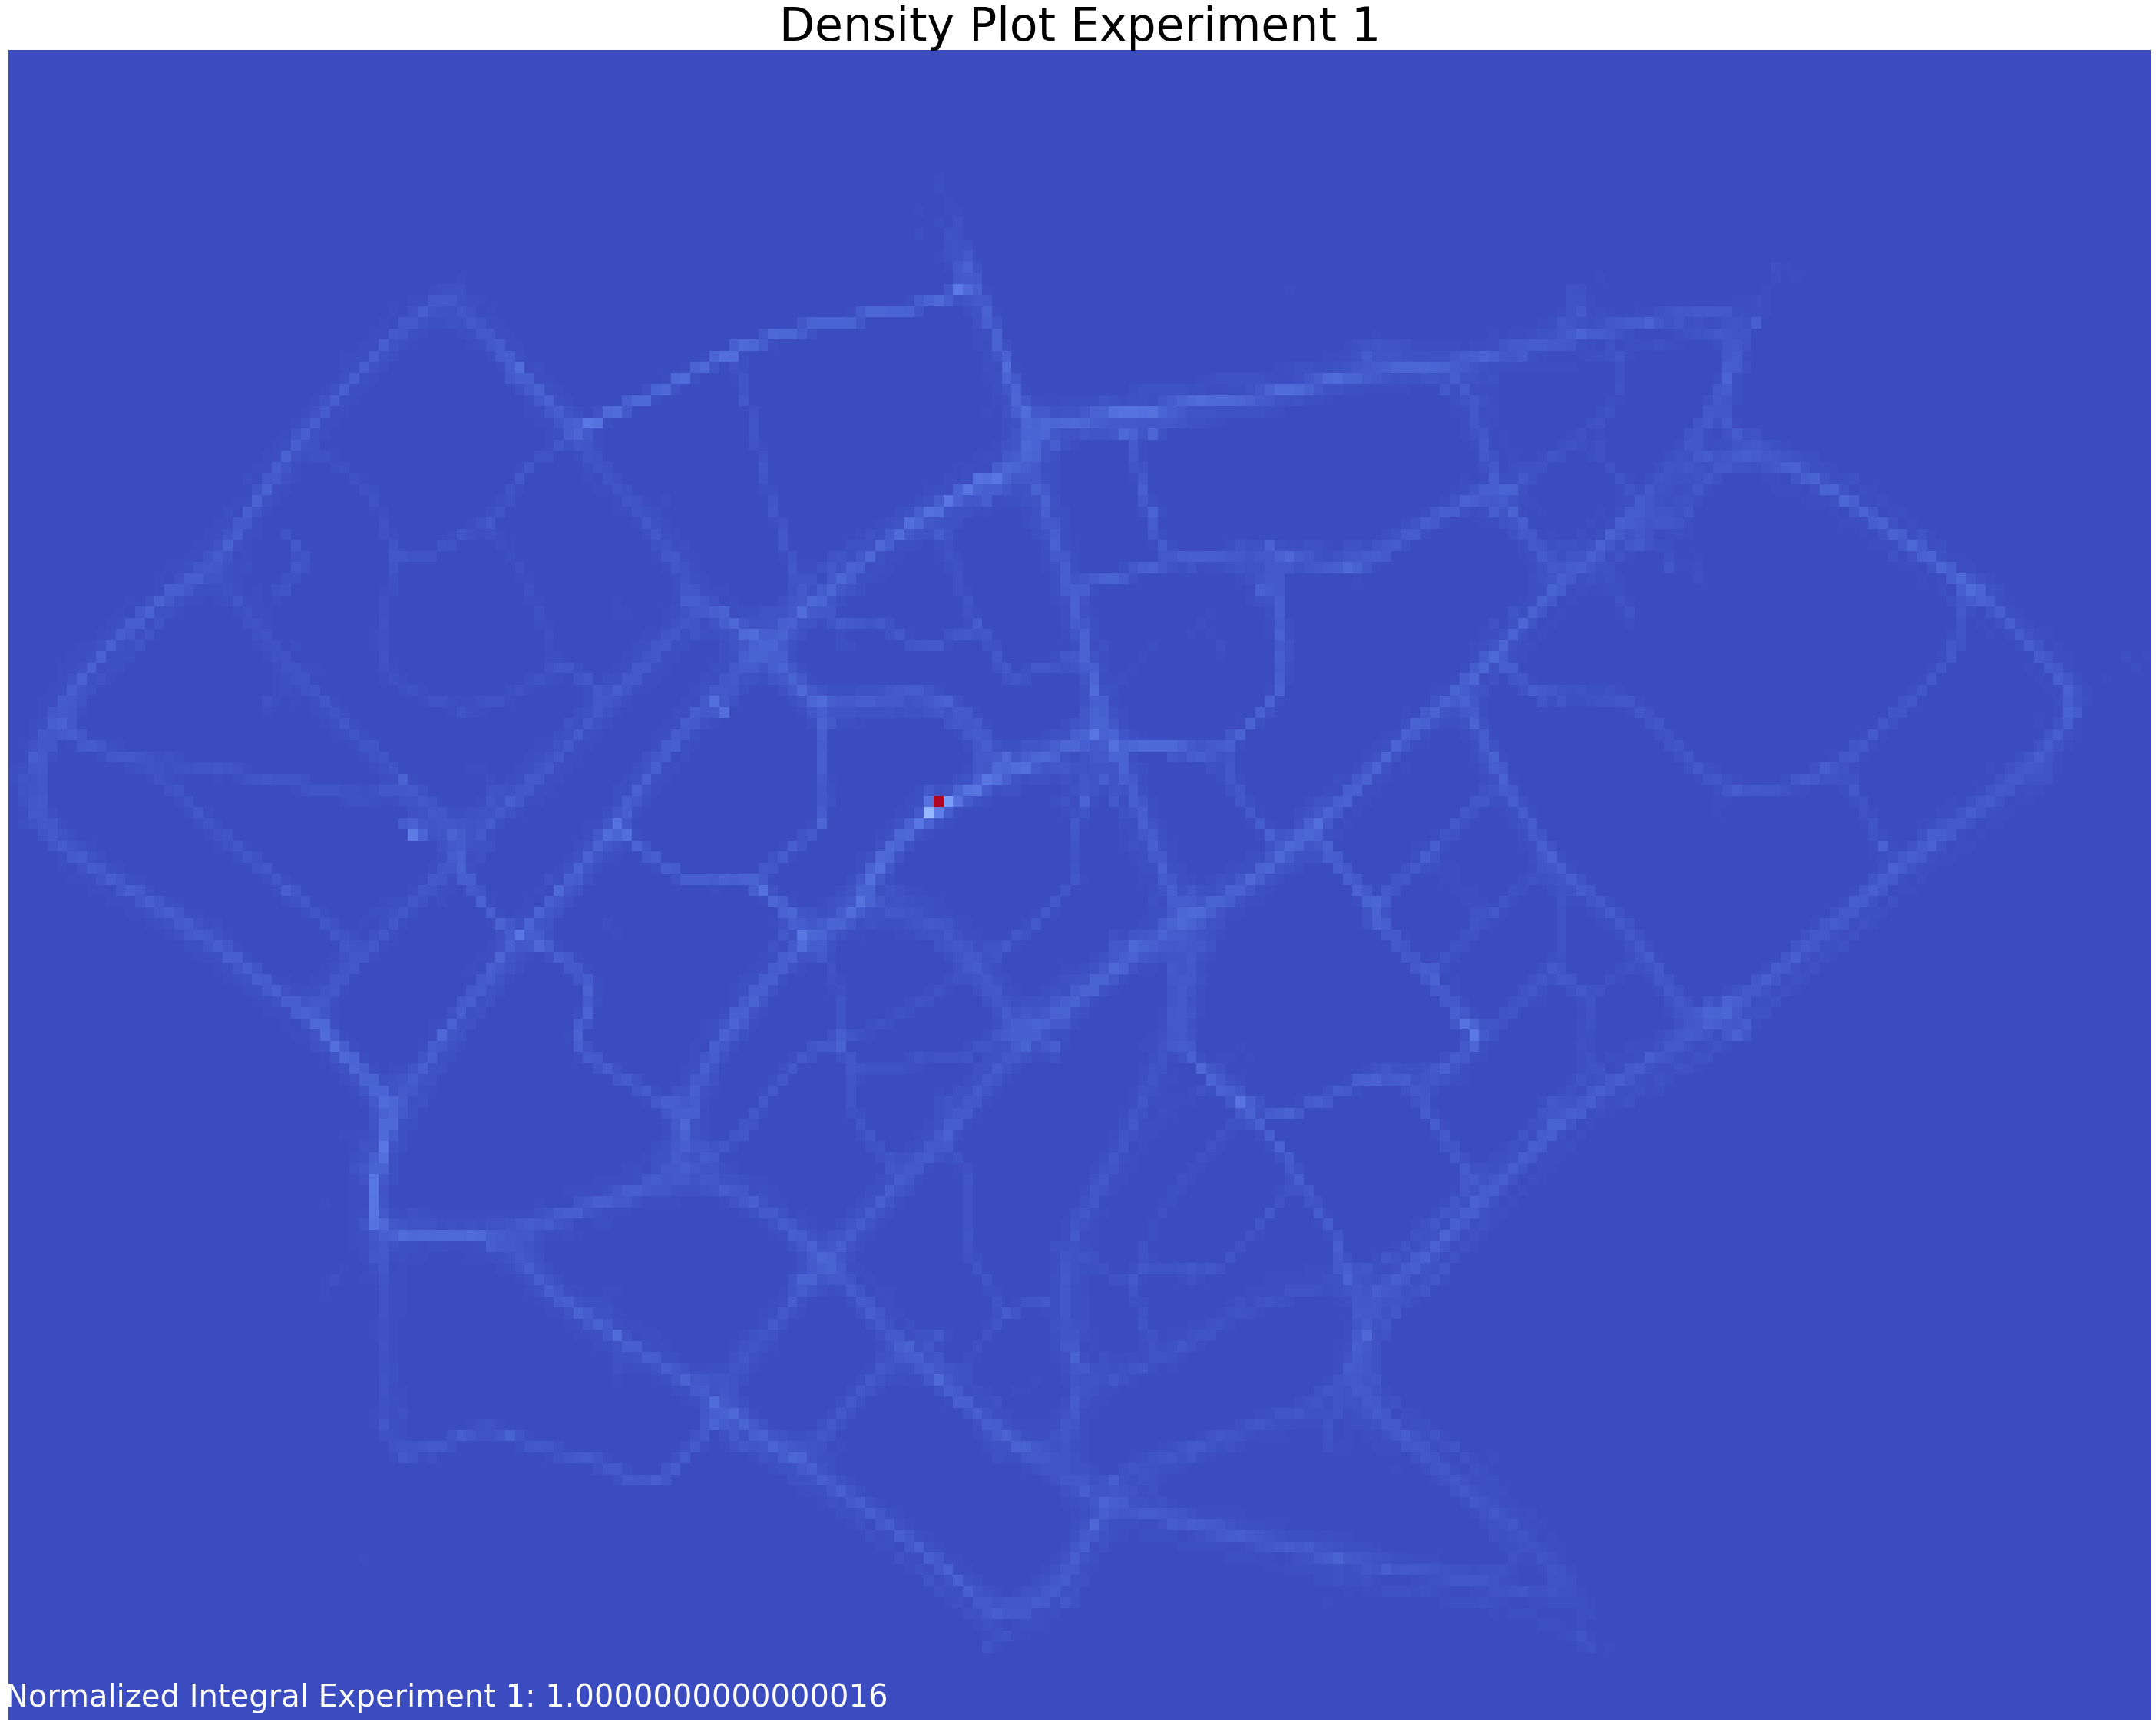

In [32]:
fig1 = plt.figure(figsize=(50,40))
heat_map_exp1 = sns.heatmap(rotate_matrix(density_matrix_exp1), xticklabels=False, yticklabels=False, 
                            cmap='coolwarm', cbar=False)
plt.gca().invert_yaxis()
plt.title('Density Plot Experiment 1', fontsize = 60)
plt.text(45, 2, 'Normalized Integral Experiment 1: ' + str(norm_sum_exp1), horizontalalignment='center',
         verticalalignment='center', fontsize = 40, c = 'white')
plt.show()

#fig.savefig((save_path + filename_exp1), transparent = True)

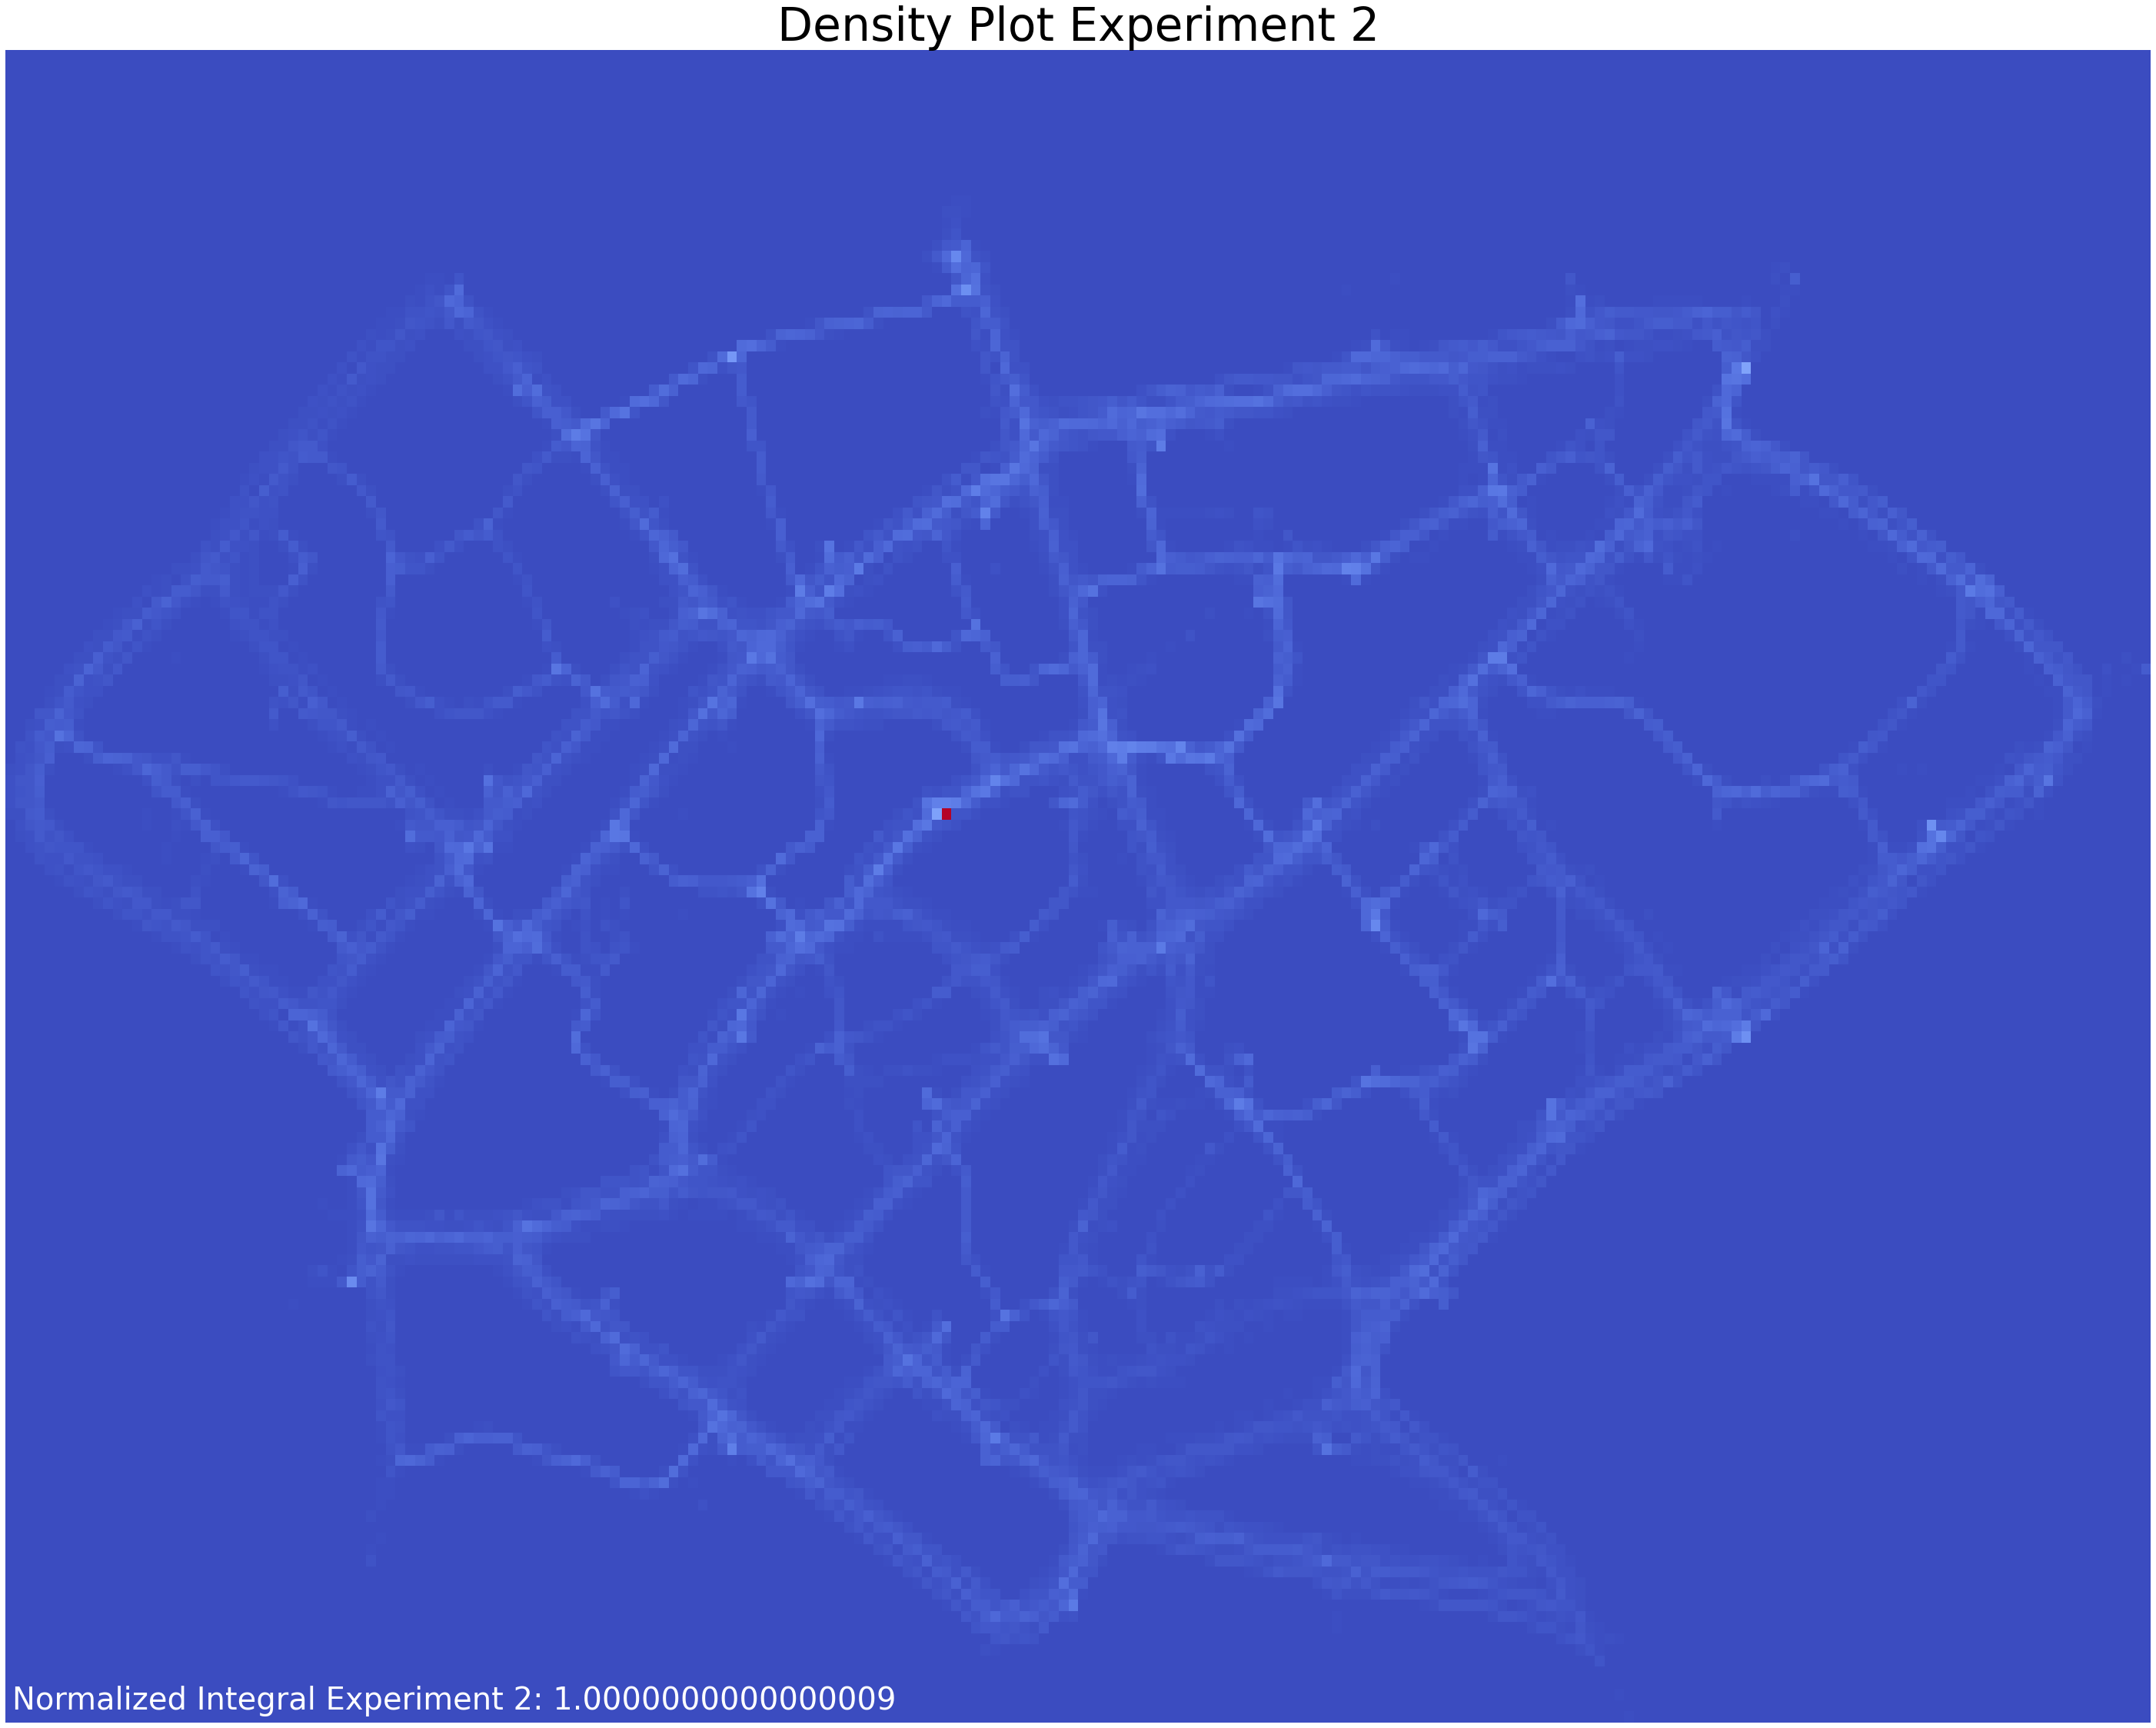

In [33]:
fig2 = plt.figure(figsize=(50,40))
heat_map_exp2 = sns.heatmap(rotate_matrix(density_matrix_exp2), xticklabels=False, yticklabels=False, 
                            cmap='coolwarm', cbar=False)
plt.title('Density Plot Experiment 2', fontsize = 60)
plt.text(46, 2, 'Normalized Integral Experiment 2: ' + str(norm_sum_exp2), horizontalalignment='center',
         verticalalignment='center', fontsize = 40, c = 'white')

plt.gca().invert_yaxis()
plt.show()
#fig.savefig((save_path + filename_exp1), transparent = True)

In [65]:
save_path = "E:/HumanA/Analysis/Graphs/"
filename_exp1 = "Density_Plot_Exp1.png"
filename_exp2 = "Density_Plot_Exp2.png"
fig1.savefig((save_path + filename_exp1), transparent = False, facecolor = 'white')
fig2.savefig((save_path + filename_exp2), transparent = False, facecolor = 'white')